<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(_0_4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-0.4_n250.csv',
 'data_add_delta_-0.4_n120.csv',
 'data_add_delta_-0.4_n60.csv',
 'data_add_delta_-0.4_n30.csv',
 'data_add_delta_-0.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,54.266279,49.846687,89.788729,-0.686947,203.214747,203.583375,-0.368628
1,0.0,1.0,79.278513,73.611907,35.879667,0.887367,199.657455,198.926113,0.731342
2,0.0,2.0,89.458052,81.226335,43.234374,0.165602,224.084363,224.014699,0.069664
3,0.0,3.0,22.100758,96.049180,73.842106,-0.539543,201.452500,202.181489,-0.728989
4,0.0,4.0,90.533637,67.361013,34.370402,-0.685880,201.579172,202.355350,-0.776179
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,55.512881,67.767928,47.014323,-0.197875,180.097257,180.228266,-0.131009
29996,999.0,26.0,95.432322,26.200930,86.304349,0.100513,218.038114,217.937248,0.100866
29997,999.0,27.0,42.790320,46.915556,39.261788,-0.183226,138.784438,138.811203,-0.026765
29998,999.0,28.0,55.499214,36.665307,60.157215,-1.091648,161.230087,162.185488,-0.955401


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,54.266279,49.846687,89.788729,-0.686947,203.214747,203.583375,-0.368628
1,0.0,1.0,79.278513,73.611907,35.879667,0.887367,199.657455,198.926113,0.731342
2,0.0,2.0,89.458052,81.226335,43.234374,0.165602,224.084363,224.014699,0.069664
3,0.0,3.0,22.100758,96.049180,73.842106,-0.539543,201.452500,202.181489,-0.728989
4,0.0,4.0,90.533637,67.361013,34.370402,-0.685880,201.579172,202.355350,-0.776179
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,55.512881,67.767928,47.014323,-0.197875,180.097257,180.228266,-0.131009
29996,999.0,26.0,95.432322,26.200930,86.304349,0.100513,218.038114,217.937248,0.100866
29997,999.0,27.0,42.790320,46.915556,39.261788,-0.183226,138.784438,138.811203,-0.026765
29998,999.0,28.0,55.499214,36.665307,60.157215,-1.091648,161.230087,162.185488,-0.955401


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    54.266279  49.846687  89.788729 -0.686947  203.214747   
      1.0    79.278513  73.611907  35.879667  0.887367  199.657455   
      2.0    89.458052  81.226335  43.234374  0.165602  224.084363   
      3.0    22.100758  96.049180  73.842106 -0.539543  201.452500   
      4.0    90.533637  67.361013  34.370402 -0.685880  201.579172   
...                ...        ...        ...       ...         ...   
999.0 25.0   55.512881  67.767928  47.014323 -0.197875  180.097257   
      26.0   95.432322  26.200930  86.304349  0.100513  218.038114   
      27.0   42.790320  46.915556  39.261788 -0.183226  138.784438   
      28.0   55.499214  36.665307  60.157215 -1.091648  161.230087   
      29.0   48.461510  33.375414  37.275827 -0.276281  128.836470   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    203.583375 -0.368628  
      1.0    198.926113  0.731342  
      2.0    224.014699  0.069664  
      3.0    202.181489 -0.728989  
      4.0    202.355350 -0.776179  
...                 ...       ...  
999.0 25.0   180.228266 -0.131009  
      26.0   217.937248  0.100866  
      27.0   138.811203 -0.026765  
      28.0   162.185488 -0.955401  
      29.0   128.957237 -0.120767  

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    54.266279  49.846687  89.788729 -0.686947  203.214747   
      1.0    79.278513  73.611907  35.879667  0.887367  199.657455   
      2.0    89.458052  81.226335  43.234374  0.165602  224.084363   
      3.0    22.100758  96.049180  73.842106 -0.539543  201.452500   
      4.0    90.533637  67.361013  34.370402 -0.685880  201.579172   
...                ...        ...        ...       ...         ...   
999.0 25.0   55.512881  67.767928  47.014323 -0.197875  180.097257   
      26.0   95.432322  26.200930  86.304349  0.100513  218.038114   
      27.0   42.790320  46.915556  39.261788 -0.183226  138.784438   
      28.0   55.499214  36.665307  60.157215 -1.091648  161.230087   
      29.0   48.461510  33.375414  37.275827 -0.276281  128.836470   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    203.583375 -0.368628  
      1.0    198.926113  0.731342  
      2.0    224.014699  0.069664  
      3.0    202.181489 -0.728989  
      4.0    202.355350 -0.776179  
...                 ...       ...  
999.0 25.0   180.228266 -0.131009  
      26.0   217.937248  0.100866  
      27.0   138.811203 -0.026765  
      28.0   162.185488 -0.955401  
      29.0   128.957237 -0.120767  

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,54.266279,49.846687,89.788729,-0.686947,203.214747,203.583375,-0.368628
1,0.0,1.0,79.278513,73.611907,35.879667,0.887367,199.657455,198.926113,0.731342
2,0.0,2.0,89.458052,81.226335,43.234374,0.165602,224.084363,224.014699,0.069664
3,0.0,3.0,22.100758,96.049180,73.842106,-0.539543,201.452500,202.181489,-0.728989
4,0.0,4.0,90.533637,67.361013,34.370402,-0.685880,201.579172,202.355350,-0.776179
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,55.512881,67.767928,47.014323,-0.197875,180.097257,180.228266,-0.131009
29996,999.0,26.0,95.432322,26.200930,86.304349,0.100513,218.038114,217.937248,0.100866
29997,999.0,27.0,42.790320,46.915556,39.261788,-0.183226,138.784438,138.811203,-0.026765
29998,999.0,28.0,55.499214,36.665307,60.157215,-1.091648,161.230087,162.185488,-0.955401


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    54.266279  49.846687  89.788729 -0.686947  203.214747   
      1.0    79.278513  73.611907  35.879667  0.887367  199.657455   
      2.0    89.458052  81.226335  43.234374  0.165602  224.084363   
      3.0    22.100758  96.049180  73.842106 -0.539543  201.452500   
      4.0    90.533637  67.361013  34.370402 -0.685880  201.579172   
...                ...        ...        ...       ...         ...   
999.0 25.0   55.512881  67.767928  47.014323 -0.197875  180.097257   
      26.0   95.432322  26.200930  86.304349  0.100513  218.038114   
      27.0   42.790320  46.915556  39.261788 -0.183226  138.784438   
      28.0   55.499214  36.665307  60.157215 -1.091648  161.230087   
      29.0   48.461510  33.375414  37.275827 -0.276281  128.836470   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    203.583375 -0.368628  
      1.0    198.926113  0.731342  
      2.0    224.014699  0.069664  
      3.0    202.181489 -0.728989  
      4.0    202.355350 -0.776179  
...                 ...       ...  
999.0 25.0   180.228266 -0.131009  
      26.0   217.937248  0.100866  
      27.0   138.811203 -0.026765  
      28.0   162.185488 -0.955401  
      29.0   128.957237 -0.120767  

[30000 rows x 7 columns]

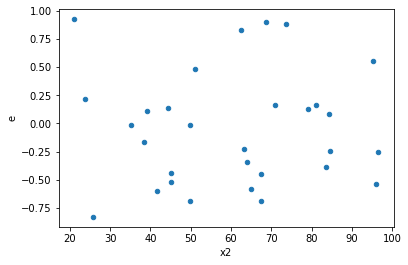

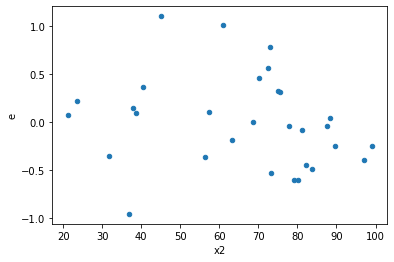

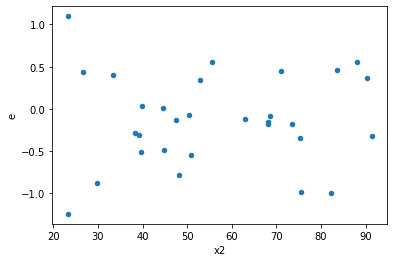

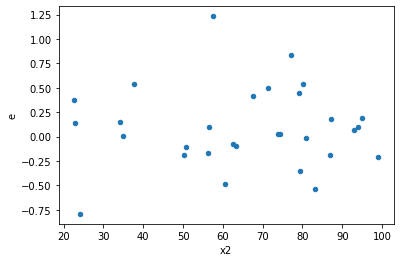

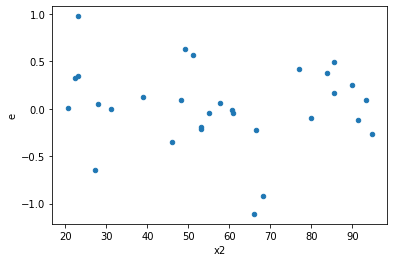

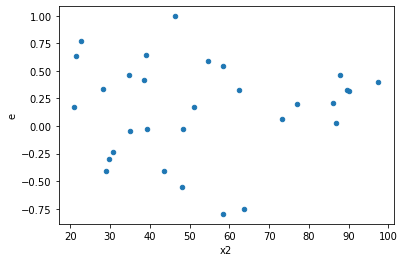

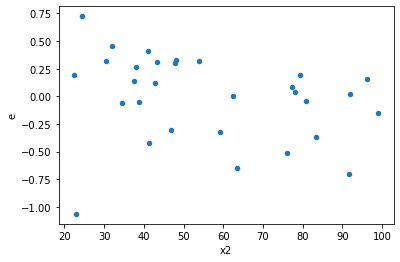

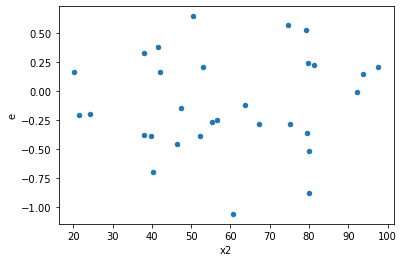

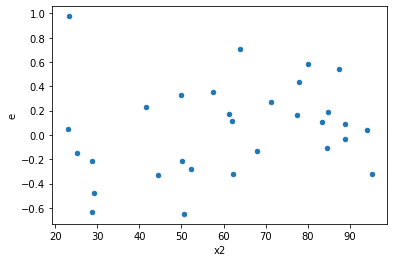

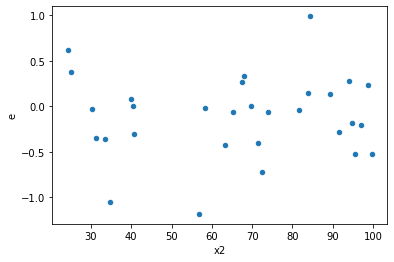

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
4.0,9.0,9.0,1.0670473184813947,2.4209622328562506,0.1185608131645994,0.26899580365069453,2.2688424317505684,0.23813468040928965,0.8809326597953552,0.11906734020464482,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,1.0619509723923495,2.1624734881204906,0.11799455248803883,0.24027483201338784,2.0363213974454,0.3043119415427329,0.8478440292286336,0.15215597077136644,Reject001=1 : Homoscedasticity
9.0,9.0,9.0,2.256535587641685,2.690988879298697,0.2507261764046317,0.2989987643665219,1.1925311056631998,0.7973832874250513,0.6013083562874744,0.39869164371252563,Reject001=1 : Homoscedasticity
14.0,9.0,9.0,1.3785117820324626,2.071356102876149,0.15316797578138475,0.2301506780973499,1.5026031187213824,0.5537670266804942,0.7231164866597529,0.2768835133402471,Reject001=1 : Homoscedasticity
18.0,9.0,9.0,0.7701697328826022,1.101362125603845,0.08557441476473357,0.12237356951153834,1.4300251990968944,0.602695676494952,0.698652161752524,0.301347838247476,Reject001=1 : Homoscedasticity
19.0,9.0,9.0,1.072000878800558,1.7410853194288243,0.11911120875561755,0.19345392438098047,1.6241454217620535,0.4812704879519256,0.7593647560240372,0.2406352439759628,Reject001=1 : Homoscedasticity
26.0,9.0,9.0,1.062708843755675,1.1111413828013894,0.11807876041729723,0.12346015364459882,1.045574608069084,0.948158425563417,0.5259207872182915,0.4740792127817085,Reject001=1 : Homoscedasticity
31.0,9.0,9.0,0.30206315349690604,1.230268818688597,0.03356257261076734,0.1366965354098441,4.07288609830791,0.04824977978068534,0.9758751101096573,0.02412488989034267,Reject001=1 : Homoscedasticity
35.0,9.0,9.0,1.0074947239959378,1.9307265818910908,0.11194385822177086,0.21452517576567676,1.9163639629132942,0.3466860426048357,0.8266569786975821,0.17334302130241785,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,1.9469524468302506,0.7419645281641501,0.2163280496478056,0.08244050312935002,0.3810902158253072,0.16687393650818536,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,2.5724052232631527,1.3992795218793324,0.28582280258479476,0.15547550243103692,0.5439576584688766,0.37786954263305095,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,3.8020013879216483,2.37609620103592,0.4224445986579609,0.2640106890039911,0.6249593197373359,0.49473486275207934,Reject001=1 : Homoscedasticity
3.0,9.0,9.0,2.953699808837953,1.3084805680838443,0.32818886764866145,0.1453867297870938,0.442997140118524,0.24098198962965334,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,1.0670473184813947,2.4209622328562506,0.1185608131645994,0.26899580365069453,2.2688424317505684,0.23813468040928965,Reject001=1 : Homoscedasticity
5.0,9.0,9.0,1.701919219273713,1.5189790963435401,0.189102135474857,0.16877545514928224,0.8925095146359286,0.8682591855303015,Reject001=1 : Homoscedasticity
6.0,9.0,9.0,1.9075075278772178,0.7039612119493658,0.21194528087524642,0.07821791243881843,0.369047671718902,0.15367872230814564,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,1.0619509723923495,2.1624734881204906,0.11799455248803883,0.24027483201338784,2.0363213974454,0.3043119415427329,Reject001=1 : Homoscedasticity
8.0,9.0,9.0,2.04008259399328,0.6773340480445095,0.2266758437770311,0.07525933867161216,0.3320130518434984,0.11604649260403598,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      987
Reject001=0 : Heteroscedasticity     13
Name: Result_test, dtype: int64